In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('F:\\bank-additional-full.csv',sep=';')

In [2]:
data.shape

(41188, 21)

In [3]:
tot=len(set(data.index))
last=data.shape[0]-tot
last

0

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

no     36548
yes     4640
Name: y, dtype: int64


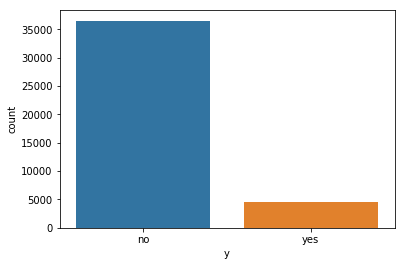

In [5]:
print(data.y.value_counts())
sns.countplot(x='y', data=data)
plt.show()

In [6]:
cat=data.select_dtypes(include=['object']).columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [7]:
for c in cat:
    print(c)
    print("-"*50)
    print(data[c].value_counts())
    print("-"*50)
    

job
--------------------------------------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------
marital
--------------------------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------
education
--------------------------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
default
--

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
data['y']=le.fit_transform(data['y'])

In [9]:
data.drop('poutcome',axis=1,inplace=True)

In [10]:
print( data['age'].quantile(q = 0.75) + 
                      1.5*(data['age'].quantile(q = 0.75) - data['age'].quantile(q = 0.25)))

69.5


In [11]:
data['age']=data[data['age']<69.6]
data['age'].fillna(int(data['age'].mean()),inplace=True)

In [12]:
data['age'].values

array([56., 57., 37., ..., 56., 44., 39.])

In [13]:
data[['age','y']].groupby(['age'],as_index=False).mean().sort_values(by='y', ascending=False)

,age,y
48,65.0,0.522727
49,66.0,0.508772
2,19.0,0.476190
47,64.0,0.473684
51,68.0,0.454545
44,61.0,0.438356
1,18.0,0.428571
50,67.0,0.423077
52,69.0,0.411765
45,62.0,0.403226


In [14]:
# for x in data:
#     x['Sex'] = x['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [15]:
data['age_slice'] = pd.cut(data['age'],5)
data[['age_slice', 'y']].groupby(['age_slice'], as_index=False).mean().sort_values(by='age_slice', ascending=True)

,age_slice,y
0,"(16.948, 27.4]",0.181960
1,"(27.4, 37.8]",0.108440
2,"(37.8, 48.2]",0.096730
3,"(48.2, 58.6]",0.094363
4,"(58.6, 69.0]",0.269587


In [16]:
data['age'] = data['age'].astype(int)
data.loc[(data['age'] >= 16) & (data['age'] <= 28), 'age'] = 1
data.loc[(data['age'] > 28) & (data['age'] <= 38), 'age'] = 2
data.loc[(data['age'] > 38) & (data['age'] <= 49), 'age'] = 3
data.loc[ (data['age'] > 49) & (data['age'] <= 59), 'age'] = 4
data.loc[ (data['age'] > 59 )& (data['age'] <= 69), 'age'] = 5


In [17]:
data.drop('age_slice',axis=1,inplace=True)

In [18]:
data['marital'].replace(['divorced' ,'married' , 'unknown' , 'single'] ,['single','married','unknown','single'], inplace=True)

In [19]:
data['marital']=le.fit_transform(data['marital'])

In [20]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,0,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,4,services,0,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,2,services,0,high.school,no,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,3,admin.,0,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,4,services,0,high.school,no,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
5,3,services,0,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,4,admin.,0,professional.course,no,no,no,telephone,may,mon,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
7,3,blue-collar,0,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
8,1,technician,1,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
9,1,services,1,high.school,no,yes,no,telephone,may,mon,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
data['job'].replace(['student'] ,['unemployed'], inplace=True)

In [22]:
data[['education', 'y']].groupby(['education'], as_index=False).mean().sort_values(by='education', ascending=True)

,education,y
0,basic.4y,0.102490
1,basic.6y,0.082024
2,basic.9y,0.078246
3,high.school,0.108355
4,illiterate,0.222222
5,professional.course,0.113485
6,university.degree,0.137245
7,unknown,0.145003


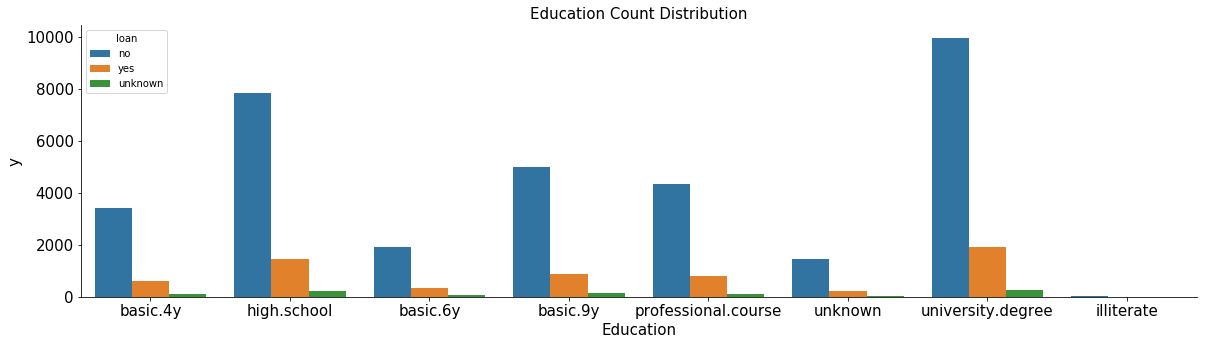

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', hue = 'loan', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

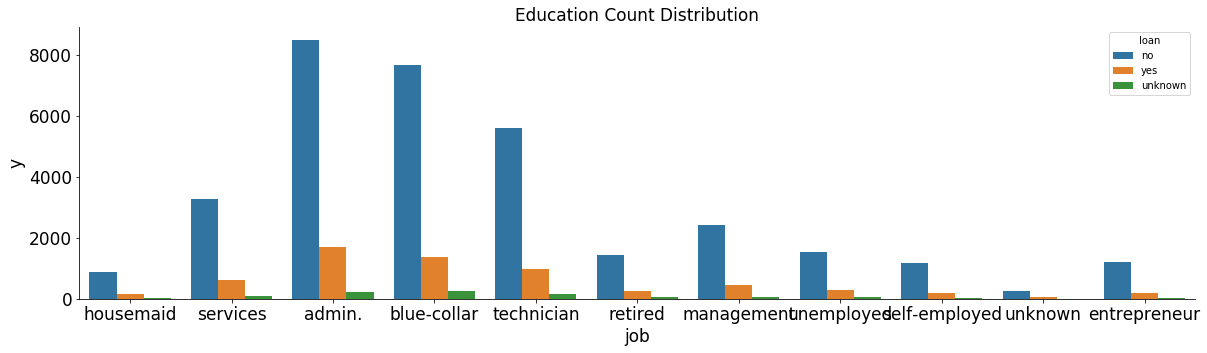

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job', hue = 'loan', data = data)
ax.set_xlabel('job', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_title('Education Count Distribution', fontsize=17)
ax.tick_params(labelsize=17)
sns.despine()

In [25]:
data['education'].replace(['basic.4y','basic.6y','basic.9y','professional.course'] ,['not_reach_highschool','not_reach_highschool','not_reach_highschool','university.degree'], inplace=True)

In [26]:
ohe=OneHotEncoder()
data['default']=le.fit_transform(data['default'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['month']=le.fit_transform(data['month'])
ohe=OneHotEncoder(categorical_features=data['month'])
data['contact']=le.fit_transform(data['contact'])
data['day_of_week']=le.fit_transform(data['day_of_week'])
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])

In [27]:
cat=data.select_dtypes(include=['object']).columns
cat

Index([], dtype='object')

In [28]:
def outlier_detect(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    data = data.loc[(data[feature] > lower) & (data[feature] < upper)]
    print('lower IQR and upper IQR of',feature,"are:", lower, 'and', upper, 'respectively')
    return data


In [29]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [30]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [31]:
data['pdays'].replace([999] ,[0], inplace=True)

In [32]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

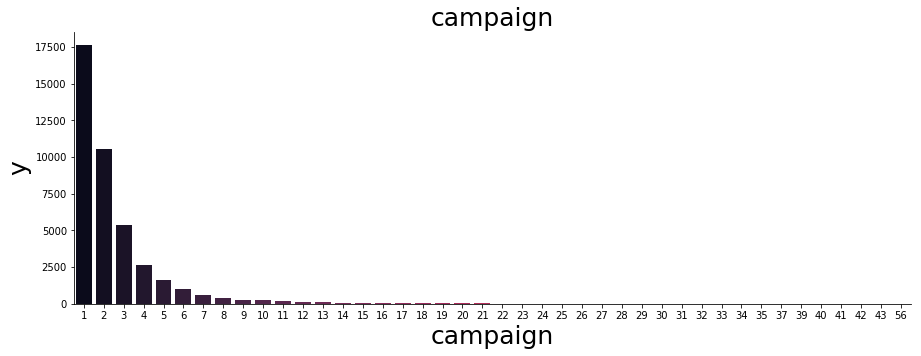

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = data)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

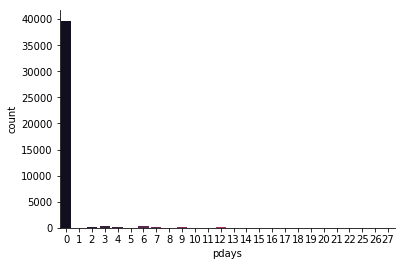

In [34]:
sns.countplot(x = 'pdays',  palette="rocket", data = data)
ax.set_xlabel('pdays', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.set_title('pdays', fontsize=25)
sns.despine()

In [35]:
data[['pdays', 'y']].groupby(['pdays'], as_index=False).mean().sort_values(by='pdays', ascending=True)

,pdays,y
0,0,0.092799
1,1,0.307692
2,2,0.606557
3,3,0.678815
4,4,0.533898
5,5,0.630435
6,6,0.701456
7,7,0.666667
8,8,0.666667
9,9,0.546875


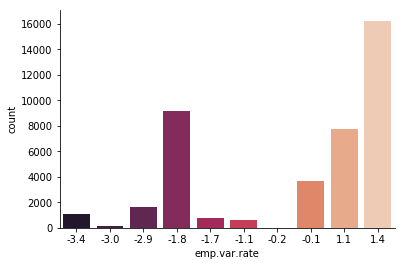

In [36]:
sns.countplot(x = 'emp.var.rate',  palette="rocket", data = data)
ax.set_xlabel('emp.var.rate', fontsize=25)
ax.set_ylabel('y', fontsize=25)
ax.set_title('emp.var.rate', fontsize=25)
sns.despine()

In [37]:
outlier_detect(data,'duration')
#outlier_detect(data,'emp.var.rate')
outlier_detect(data,'nr.employed')
#outlier_detect(data,'euribor3m')

lower IQR and upper IQR of duration are: -223.5 and 644.5 respectively
lower IQR and upper IQR of nr.employed are: 4905.6 and 5421.6 respectively


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,3,0,2,0,0,0,1,6,1,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,4,7,0,0,1,0,0,1,6,1,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,0,0,0,2,0,1,6,1,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,0,2,0,0,0,1,6,1,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,4,7,0,0,0,0,2,1,6,1,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,3,7,0,2,1,0,0,1,6,1,198,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,4,0,0,3,0,0,0,1,6,1,139,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,3,1,0,4,1,0,0,1,6,1,217,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,1,8,1,3,0,2,0,1,6,1,380,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,1,7,1,0,0,2,0,1,6,1,50,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [38]:
X = data.iloc[:,:-1]
X = X.values
y = data['y'].values

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

c:\users\varlock^_^\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
algo = {'LR': LogisticRegression(), 
        'DT':DecisionTreeClassifier(), 
        'RFC':RandomForestClassifier(n_estimators=100), 
        'SVM':SVC(gamma=0.01),
        'KNN':KNeighborsClassifier(n_neighbors=10)
       }

for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))

Acurracy of LR is 91.22
Acurracy of DT is 89.04
Acurracy of RFC is 91.58
Acurracy of SVM is 90.99
Acurracy of KNN is 90.82
